# Readme
**Data Challenge Assignment**

Pathrise is an online program dedicated to helping job seekers land the best possible tech jobs through personalized 1-on-1 mentorship, training, and expert advice. Every two weeks, Pathrise welcomes a new cohort of fellows. Candidates interested in joining our program who successfully complete all stages of the admission process receive an offer to become a Pathrise fellow.

On average, fellows who continue with us after their free trial period take approximately 4 months to receive a final job offer. However, there's significant variation in the outcomes our fellows achieve. For our business, being able to predict how quickly each fellow will find a job is crucial. In this exercise, we provide you with a sample of the information we've collected from our fellows from the moment they joined the program.

The primary goal of your analysis is to gain insights into whether a fellow will ultimately be placed at a company and how long that placement is expected to take.

**Objectives**

- Perform Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib.
- Exploratory Data Analysis
- Data Preparation
- Feature Engineering

# Preprocessing and Exploratory Data Analysis (EDA) for the Pathrise project

In [3]:
import os
os.getcwd()

'C:\\Users\\Mahdi'

# Import Libraries

In [5]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns


# Read the data

In [7]:
df = pd.read_excel('Data_Pathrise.xlsx')

# Exploratory Data Analysis (EDA)

## Data Understanding

In [10]:
# Make a copy of the original DataFrame
new_df = df.copy()

In [11]:
df.head(2)

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American


In [12]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

# Handling missing values
اصلاح مقادیر گمشده

In [15]:
print(df.isnull().sum())

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64


In [16]:
# Print value counts for each column in the DataFrame
categorical_cols = ['pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race']

for col in categorical_cols:
    print(new_df[col].value_counts(dropna=False))
    print("\n" + "="*50 + "\n")


pathrise_status
Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: count, dtype: int64


primary_track
SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: count, dtype: int64


cohort_tag
JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
JUL19A     66
SEP19B     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV19A     62
NOV18A     62
SEP19A     60
AUG19A     60
OCT19B     54
JUN19A     54
SEP18C     54
AUG18A     50
SEP18B     50
APR19A     48
SEP18A     48
JUN18A     48
MAR19B     44
JUL19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
FEB18A     30
MAR18A     30
APR18B     30
FEB20B     28
APR18A     24
M

In [17]:
# Calculating the percentage distribution of the 'placed' column
df['placed'].value_counts(normalize=True)

placed
0    0.624214
1    0.375786
Name: proportion, dtype: float64

In [18]:
# Calculating the percentage distribution of the 'placed' column
new_df['placed'].value_counts(normalize=True) 

placed
0    0.624214
1    0.375786
Name: proportion, dtype: float64

In [19]:
# Displaying the number of rows with missing values in all three specified columns
# نمایش تعداد ردیف‌هایی که در سه ستون مقدار گمشده دارند
missing_rows = df[df['employment_status '].isnull() & 
                  df['gender'].isnull() & 
                  df['program_duration_days'].isnull()]

print(f"The number of rows with missing columns: {missing_rows.shape[0]}")


The number of rows with missing columns: 11


In [20]:
# Displaying the number of rows with missing values in all three specified columns
# نمایش تعداد ردیف‌هایی که در سه ستون مقدار گمشده دارند
missing_rows = df[df['work_authorization_status'].isnull() & 
                  df['professional_experience'].isnull() & 
                  df['number_of_interviews'].isnull()]

print(f"The number of rows with missing columns: {missing_rows.shape[0]}")


The number of rows with missing columns: 2


In [21]:
#4
# missing values : 8
# Dropping missing values
new_df = new_df.dropna(subset=['cohort_tag'])
print(new_df['cohort_tag'].isna().sum())


0


In [22]:
#5
# missing values : 616
# Target variable
# Checking for changes
print(new_df['program_duration_days'].isna().sum())


614


In [23]:
df['program_duration_days'].median() 

112.0

In [24]:
(df['program_duration_days'] == 112).sum()

2

In [25]:
#7
# missing values : 229

# Identifying missing values
missing_values_count = new_df['employment_status '].isnull().sum()
# Extracting non-missing values
non_missing_values = new_df['employment_status '].dropna()
# Random selection with replacement
if not non_missing_values.empty and missing_values_count > 0:
    random_fill = np.random.choice(non_missing_values, size=missing_values_count)
    # Replacing missing values
    new_df.loc[df['employment_status '].isnull(), 'employment_status '] = random_fill


In [26]:
# Checking for changes
print(new_df['employment_status '].isnull().sum())

0


In [27]:
# Compare the value counts of the 'employment_status ' column from df and new_df
counts_df = pd.concat([
    df['employment_status '].value_counts().rename('df'),
    new_df['employment_status '].value_counts().rename('new_df')
], axis=1)

print(counts_df)

                     df  new_df
employment_status              
Student             775     853
Unemployed          665     740
Employed Full-Time  435     465
Employed Part-Time  270     291
Contractor          170     187


In [28]:
#8
# missing values : 58
# Dropping rows that contain missing data
# حذف ردیف‌هایی که داده گمشده  دارند
new_df = new_df.dropna(subset=['highest_level_of_education'])

# Checking for changes
print(new_df['highest_level_of_education'].isnull().sum())

0


In [29]:
#9
# missing values : 74
# Dropping rows that contain missing data
# حذف ردیف‌هایی که داده گمشده  دارند
new_df = new_df.dropna(subset=['length_of_job_search'])

# Checking for changes
print(new_df['length_of_job_search'].isnull().sum())

0


In [30]:
#10
# missing values : 24
# Dropping rows that contain missing data
# حذف ردیف‌هایی که داده گمشده  دارند
new_df = new_df.dropna(subset=['biggest_challenge_in_search'])

# Checking for changes
print(new_df['biggest_challenge_in_search'].isnull().sum())

0


In [31]:
#11
# missing values : 222

# Identifying missing values
missing_values_count = new_df['professional_experience'].isnull().sum()
# Extracting non-missing values
non_missing_values = new_df['professional_experience'].dropna()
# Random selection with replacement
if not non_missing_values.empty and missing_values_count > 0:
    random_fill = np.random.choice(non_missing_values, size=missing_values_count)
    # Replacing missing values
    new_df.loc[df['professional_experience'].isnull(), 'professional_experience'] = random_fill


In [32]:
# Checking for changes
print(new_df['professional_experience'].isnull().sum())

0


In [33]:
# Compare the value counts of the 'professional_experience' column from df and new_df
counts_df = pd.concat([
    df['professional_experience'].value_counts().rename('df'),
    new_df['professional_experience'].value_counts().rename('new_df')
], axis=1)

print(counts_df)

                          df  new_df
professional_experience             
1-2 years                882     904
Less than one year       618     635
3-4 years                558     573
5+ years                 264     273


In [34]:
#12
# missing values : 284

# Identifying missing values
missing_values_count = new_df['work_authorization_status'].isnull().sum()
# Extracting non-missing values
non_missing_values = new_df['work_authorization_status'].dropna()
# Random selection with replacement
if not non_missing_values.empty and missing_values_count > 0:
    random_fill = np.random.choice(non_missing_values, size=missing_values_count)
    # Replacing missing values
    new_df.loc[df['work_authorization_status'].isnull(), 'work_authorization_status'] = random_fill


In [35]:
# Checking for changes
print(new_df['work_authorization_status'].isnull().sum())

0


In [36]:
# Compare the value counts of the 'work_authorization_status' column from df and new_df
counts_df = pd.concat([
    df['work_authorization_status'].value_counts().rename('df'),
    new_df['work_authorization_status'].value_counts().rename('new_df')
], axis=1)

print(counts_df)

                             df  new_df
work_authorization_status              
Citizen                    1104    1154
F1 Visa/OPT                 644     702
Green Card                  184     188
F1 Visa/CPT                 132     145
Other                       112     110
H1B                          48      46
Canada Citizen               24      27
STEM OPT                      8       9
Not Authorized                4       4


In [37]:
#13
# missing values : 218

# Identifying missing values
missing_values_count = new_df['number_of_interviews'].isnull().sum()
# Extracting non-missing values
non_missing_values = new_df['number_of_interviews'].dropna()
# Random selection with replacement
if not non_missing_values.empty and missing_values_count > 0:
    random_fill = np.random.choice(non_missing_values, size=missing_values_count)
    # Replacing missing values
    new_df.loc[df['number_of_interviews'].isnull(), 'number_of_interviews'] = random_fill


In [38]:
# Checking for changes
print(new_df['number_of_interviews'].isnull().sum())

0


In [39]:
# Compare the value counts of the 'number_of_interviews' column from df and new_df
counts_df = pd.concat([
    df['number_of_interviews'].value_counts().rename('df'),
    new_df['number_of_interviews'].value_counts().rename('new_df')
], axis=1)

print(counts_df)

                       df  new_df
number_of_interviews             
0.0                   758     782
1.0                   522     516
2.0                   307     324
3.0                   203     206
4.0                   193     204
5.0                   137     141
6.0                    76      78
7.0                    60      64
10.0                   19      21
20.0                   18      19
8.0                     6       6
11.0                    4       4
18.0                    4       2
17.0                    4       3
19.0                    3       3
14.0                    3       3
15.0                    2       2
9.0                     2       2
16.0                    2       2
12.0                    2       2
13.0                    1       1


In [40]:
#15
# missing values : 492

# Drop the 'gender' column from the DataFrame
# حذف ستون
new_df = new_df.drop(columns=['gender'])


In [41]:
#16
# missing values : 18
# Dropping rows that contain missing data
# حذف ردیف‌هایی که داده گمشده  دارند
new_df = new_df.dropna(subset=['race'])

# Checking for changes
print(new_df['race'].isna().sum())

0


In [42]:
print(new_df.isnull().sum())

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       0
program_duration_days          583
placed                           0
employment_status                0
highest_level_of_education       0
length_of_job_search             0
biggest_challenge_in_search      0
professional_experience          0
work_authorization_status        0
number_of_interviews             0
number_of_applications           0
race                             0
dtype: int64


In [43]:
new_df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,Unemployed,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,Employed Part-Time,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Decline to Self Identify


https://github.com/Mahdi-Alijani-Lati

# Data Analysis and Preprocessing


In [45]:
df['id'].value_counts()
# Unique identifier for each individual (not used for analysis)
# شناسه‌ی منحصر‌به‌فرد هر فرد (برای تحلیل استفاده نمی‌شود)

id
1       1
1700    1
1693    1
1694    1
1695    1
       ..
849     1
850     1
851     1
852     1
2544    1
Name: count, Length: 2544, dtype: int64

In [46]:
# Dropping the 'id' column
new_df = new_df.drop(columns=['id'])

In [47]:
df['pathrise_status'].value_counts() 
# Status of the individual in the Pathrise program (e.g., active, graduated, left, etc.).
# The 'pathrise_status' column conveys the same concept as the 'placed' column
# وضعیت فرد در برنامه پسرایس (فعال، فارغ‌التحصیل، ترک کرده و ...)
# با ستون "placed" یک مفوم می‌رسونه

pathrise_status
Placed                956
Active                532
Withdrawn             398
Withdrawn (Trial)     276
Closed Lost           182
Withdrawn (Failed)     82
MIA                    52
Deferred               34
Break                  32
Name: count, dtype: int64

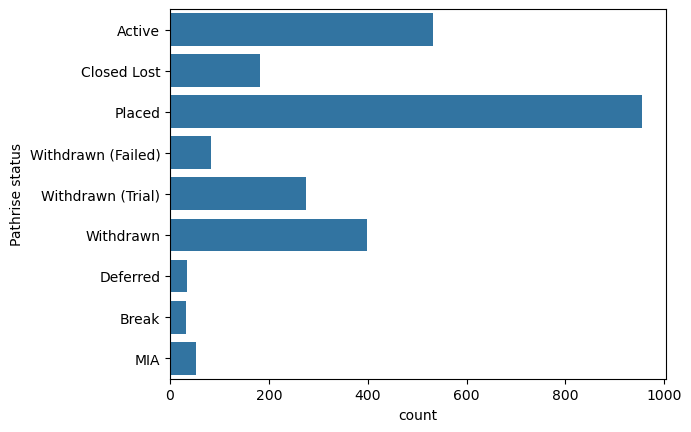

In [48]:
sns.countplot(y= 'pathrise_status', data=df)
plt.ylabel('Pathrise status')
plt.show()

In [49]:
len(new_df[new_df['pathrise_status'] == 'Closed Lost'])

169

In [50]:
# As per the project instructions, samples with undesirable status were removed
# طبق دستورالعمل پروژه، برخی نمونه‌ها با وضعیت نامطلوب از داده‌ها حذف شدند
new_df = new_df[new_df['pathrise_status'] != 'Closed Lost']

In [51]:
len(new_df[new_df['pathrise_status'] == 'MIA'])

48

In [52]:
# As per the project instructions, samples with undesirable status were removed
# طبق دستورالعمل پروژه، برخی نمونه‌ها با وضعیت نامطلوب از داده‌ها حذف شدند
new_df = new_df[new_df['pathrise_status'] != 'MIA']

In [53]:
# It is dropped because it is a duplicate of the target variable
# بخاطر از جنس تارگت بودن     
new_df = new_df.drop(columns=['pathrise_status'])

In [54]:
df['primary_track'].value_counts()
# The individual's primary field or track (e.g., software engineering, design, marketing, etc.).
# زمینه‌ی کاری فرد (مثل مهندسی نرم‌افزار، طراحی، بازاریابی و ...)

primary_track
SWE          1678
PSO           322
Design        288
Data          248
Web             6
Marketing       2
Name: count, dtype: int64

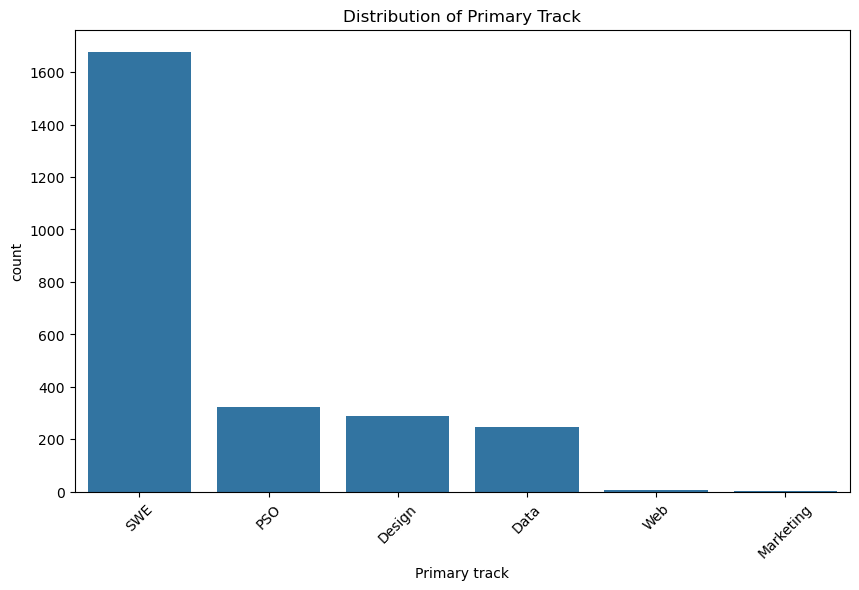

In [55]:
# Plotting the distribution of values for the 'primary_track' column
# رسم نمودار توزیع مقادیر برای ستون 'primary_track'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='primary_track')
plt.title('Distribution of Primary Track')
plt.xticks(rotation=45)
plt.xlabel('Primary track')
plt.show()


In [56]:
# Combine 'Web' and 'Marketing' categories into 'Web & Marketing'
new_df['primary_track'] = new_df['primary_track'].replace({
    'Web': 'Web & Marketing', 
    'Marketing': 'Web & Marketing'
})

In [57]:
print(new_df['primary_track'].value_counts())

primary_track
SWE                1415
PSO                 267
Design              248
Data                216
Web & Marketing       7
Name: count, dtype: int64


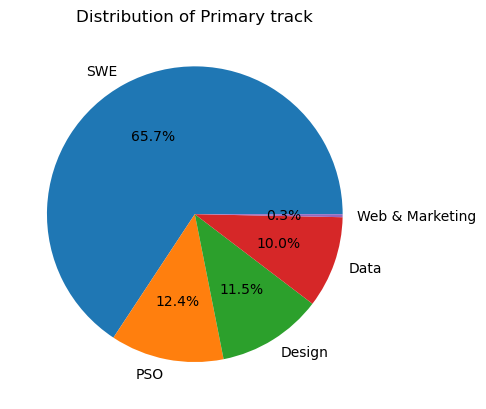

In [58]:
df_count = new_df['primary_track'].value_counts()
count=list(df_count.values)
index=list(df_count.index)
plt.pie(count,labels=index, autopct='%.1f%%')
plt.title('Distribution of Primary track')
plt.show()

In [59]:
new_df = pd.get_dummies(new_df, columns=['primary_track'])

In [60]:
# بررسی تغییرات
new_df.head(2)

,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,race,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing
0,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Non-Hispanic White or Euro-American,False,False,False,True,False
1,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Non-Hispanic White or Euro-American,False,False,True,False,False


In [61]:
df['cohort_tag'].value_counts()
# The cohort or group the individual is part of
# گروه یا دوره‌ای که فرد در آن شرکت کرده است

cohort_tag
JAN19A    132
JAN20A    124
DEC18A    116
FEB20A    108
AUG19C     88
OCT18B     84
OCT18A     82
AUG19B     82
JAN20B     82
JAN19B     74
MAR19A     74
OCT19A     68
SEP19B     66
JUL19A     66
JUN19B     64
DEC19A     64
FEB19A     64
NOV18A     62
NOV19A     62
SEP19A     60
AUG19A     60
OCT19B     54
SEP18C     54
JUN19A     54
SEP18B     50
AUG18A     50
SEP18A     48
APR19A     48
JUN18A     48
JUL19B     44
MAR19B     44
FEB19B     42
NOV19B     40
APR19B     34
MAY18A     32
MAR18A     30
APR18B     30
FEB18A     30
FEB20B     28
APR18A     24
MAY19B     20
MAY19A     18
MAR20A     10
JAN18A     10
APR20A      6
FEB20a      4
OCT21A      2
Name: count, dtype: int64

In [62]:
new_df['cohort_tag'] = new_df['cohort_tag'].str.replace('a', 'A')

In [63]:
new_df = pd.get_dummies(new_df, columns=['cohort_tag'])

In [64]:
new_df.head(2)

,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,...,cohort_tag_OCT18A,cohort_tag_OCT18B,cohort_tag_OCT19A,cohort_tag_OCT19B,cohort_tag_OCT21A,cohort_tag_SEP18A,cohort_tag_SEP18B,cohort_tag_SEP18C,cohort_tag_SEP19A,cohort_tag_SEP19B
0,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,...,False,False,True,False,False,False,False,False,False,False
1,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df['program_duration_days'].value_counts() 
# target 2
# The duration the individual spent in the Pathrise program (in days).
# مدت زمان حضور فرد در برنامه پسرایس (بر حسب روز) 

program_duration_days
0.0      217
13.0      34
11.0      27
12.0      25
14.0      22
        ... 
279.0      1
370.0      1
523.0      1
502.0      1
488.0      1
Name: count, Length: 411, dtype: int64

In [66]:
# Outlier Detection Using IQR
Q1 = df['program_duration_days'].quantile(0.25)  # 25th percentile # صدک اول (25%)
Q3 = df['program_duration_days'].quantile(0.75)  # 75th percentile # صدک سوم (75%)
# Compute the interquartile range (IQR) # محدوده بین‌چارکی
IQR = Q3 - Q1  
# Define lower and upper bounds for detecting outliers
# حد بالا و پایین برای تشخیص داده‌های پرت
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify and display outliers based on IQR method
# نمایش مقادیر پرت
outliers = df[(df['program_duration_days'] < lower_bound) | (df['program_duration_days'] > upper_bound)]

outliers

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
654,655,Placed,SWE,MAR18A,543.0,1,Employed Full-Time,Master's Degree,1-2 months,Lack of relevant experience,Less than one year,Citizen,0.0,40,Male,East Asian or Asian American
743,744,Placed,SWE,APR18B,548.0,1,Employed Part-Time,Bachelor's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,Citizen,6.0,15,Male,Non-Hispanic White or Euro-American


In [67]:
# Drop detected outlier rows from the DataFrame
new_df = new_df.drop(outliers.index)

In [68]:
df[(df['program_duration_days'] == 0) & (df['employment_status ']!='Unemployed') & (df['placed']==1)]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
608,609,Placed,SWE,NOV19A,0.0,1,Employed Full-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Green Card,NaN,8,Male,South Asian or Indian American


In [69]:
df[(df['program_duration_days'] == 0) & (df['pathrise_status']=='Placed')]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
608,609,Placed,SWE,NOV19A,0.0,1,Employed Full-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Green Card,NaN,8,Male,South Asian or Indian American


In [70]:
df[(df['program_duration_days'] == 0) & (df['placed'] == 1)]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
608,609,Placed,SWE,NOV19A,0.0,1,Employed Full-Time,Bachelor's Degree,Less than one month,Getting past final round interviews,1-2 years,Green Card,NaN,8,Male,South Asian or Indian American


In [71]:
# Remove rows with extreme outlier values based on index
new_df = new_df.drop([608])

In [72]:
len(df[(df['employment_status ']!='Unemployed') & (df['placed']==1)])

703

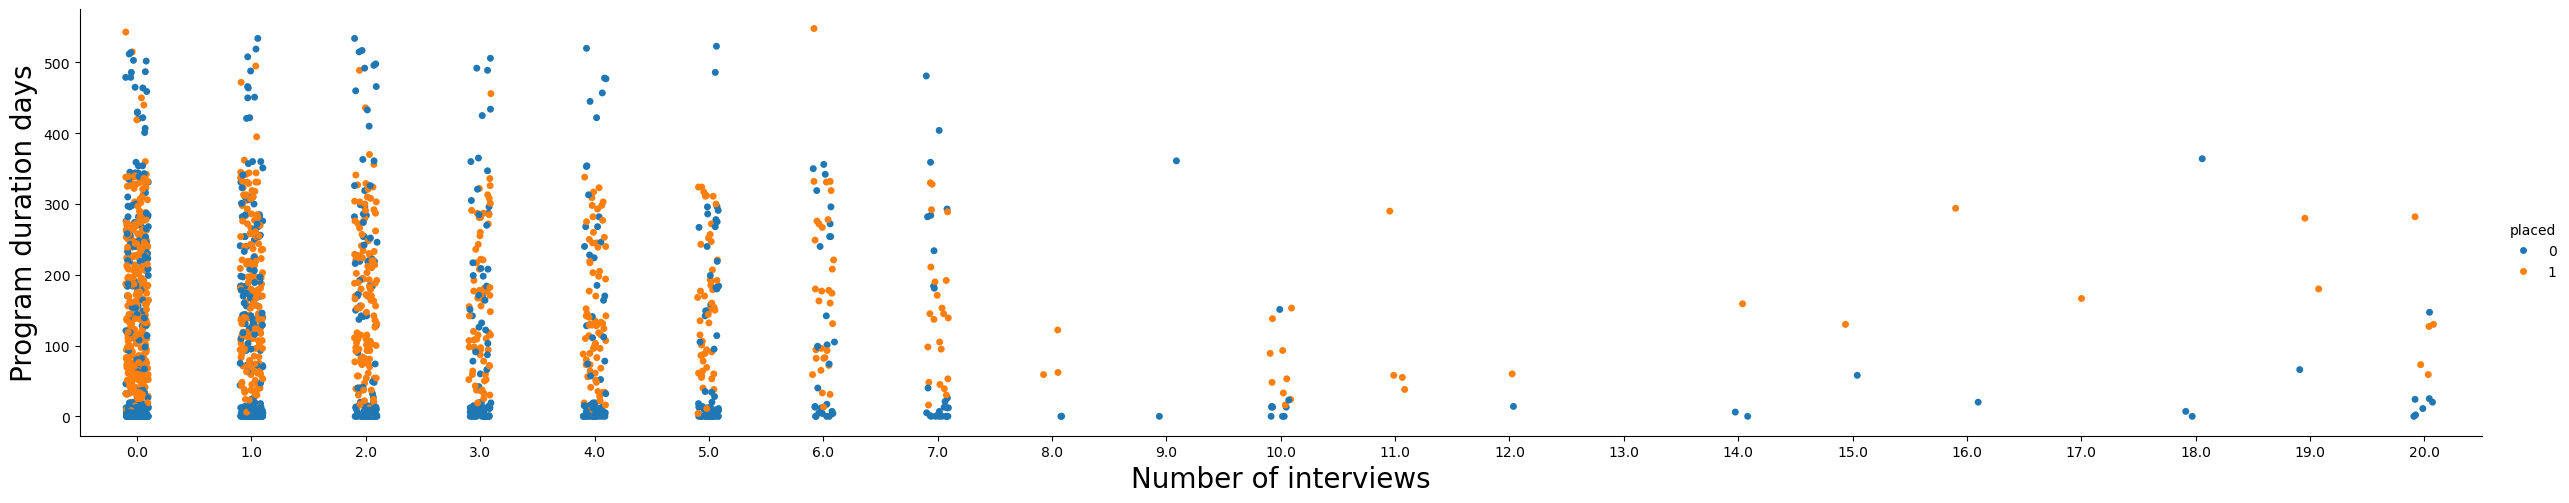

In [73]:
sns.catplot(x='number_of_interviews', y='program_duration_days', hue='placed', data=df, aspect=5)
plt.xlabel("Number of interviews",fontsize=20)
plt.ylabel("Program duration days",fontsize=20)
plt.show()

In [74]:

df[df['program_duration_days'].isnull()]['placed'].value_counts()

placed
0    616
Name: count, dtype: int64

In [75]:

df[df['program_duration_days'] == 4]['length_of_job_search'].value_counts()

length_of_job_search
Less than one month    6
1-2 months             4
3-5 months             2
6 months to a year     2
Name: count, dtype: int64

In [76]:
df[df['program_duration_days'] <=14 ]['pathrise_status'].value_counts()

pathrise_status
Withdrawn (Trial)    229
Closed Lost          182
Deferred              34
Placed                24
Withdrawn             19
Name: count, dtype: int64

In [77]:
df[df['program_duration_days'].isnull()]['pathrise_status'].value_counts()

pathrise_status
Active    532
MIA        52
Break      32
Name: count, dtype: int64

In [78]:
df[df['program_duration_days'] == 0]['pathrise_status'].value_counts()

pathrise_status
Closed Lost    182
Deferred        34
Placed           1
Name: count, dtype: int64

In [79]:
df[(df['program_duration_days'] == 0) & (df['employment_status ']!='Unemployed')]

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
5,6,Closed Lost,SWE,AUG19A,0.0,0,Employed Full-Time,Master's Degree,1-2 months,Technical interviewing,3-4 years,Green Card,5.0,100,Male,East Asian or Asian American
6,7,Closed Lost,SWE,AUG19B,0.0,0,Employed Full-Time,Master's Degree,Less than one month,Getting past phone screens,3-4 years,Green Card,0.0,9,Male,"Black, Afro-Caribbean, or African American"
24,25,Closed Lost,Design,NOV19B,0.0,0,Contractor,NaN,1-2 months,Hearing back on my applications,3-4 years,Green Card,0.0,20,NaN,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,2500,Closed Lost,SWE,JAN20A,0.0,0,Student,Doctorate or Professional Degree,Less than one month,Getting past phone screens,NaN,NaN,2.0,15,NaN,Non-Hispanic White or Euro-American
2501,2502,Closed Lost,Design,SEP19B,0.0,0,Employed Part-Time,Doctorate or Professional Degree,3-5 months,Getting past final round interviews,NaN,NaN,0.0,45,NaN,Latino or Hispanic American
2515,2516,Closed Lost,SWE,JAN20B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Hearing back on my applications,3-4 years,F1 Visa/OPT,3.0,20,Female,"Black, Afro-Caribbean, or African American"
2529,2530,Closed Lost,SWE,AUG18A,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Technical interviewing,Less than one year,NaN,5.0,45,Female,Non-Hispanic White or Euro-American


In [80]:
len(new_df[new_df['program_duration_days'] <= 14])

286

In [81]:
# Create a new column 'short_participation' that is True if 'program_duration_days' is greater than 14, otherwise False
# According to the project description
# ستون جدیدی ایجاد می‌شود که اگر تعداد روزهای برنامه بیشتر از ۱۴ روز باشد، مقدار آن 1 در غیر این صورت 0 خواهد بود
new_df['short_participation'] = (new_df['program_duration_days'] > 14)

In [82]:
(df['program_duration_days'] < 1).sum()


217

In [83]:
print(new_df['program_duration_days'].min())


0.0


In [84]:
print(df['program_duration_days'].max())

548.0


In [85]:
new_df['short_participation'].value_counts() 

short_participation
True     1329
False     821
Name: count, dtype: int64

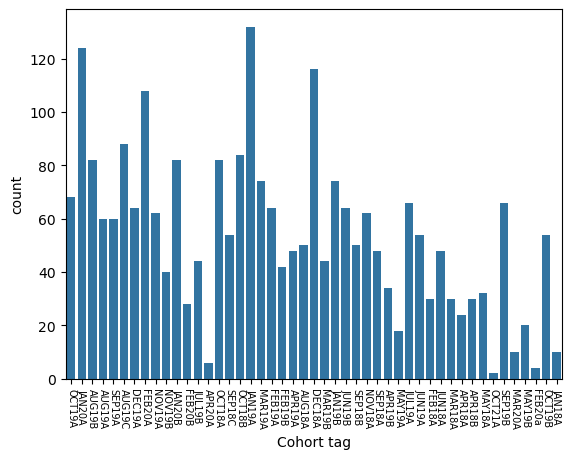

In [86]:
sns.countplot(x= 'cohort_tag', data=df)
plt.xticks(rotation= -90, fontsize=7)
plt.xlabel('Cohort tag')
plt.show()

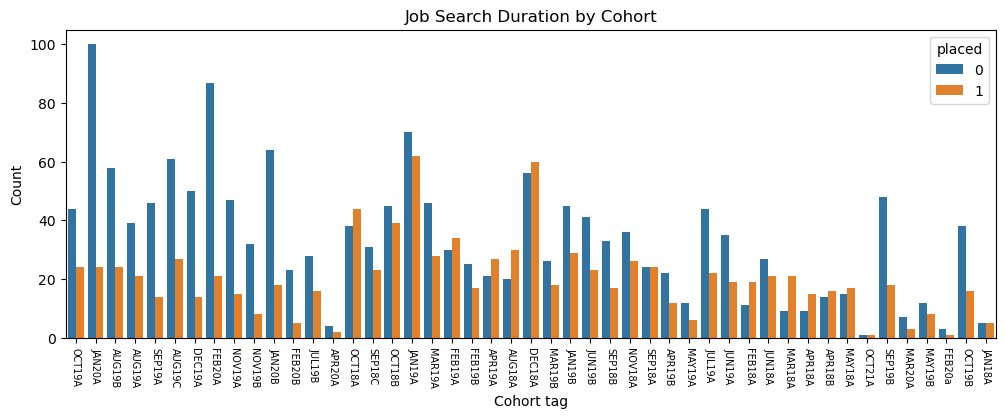

In [87]:
plt.figure(figsize=(12, 4))
sns.countplot(x='cohort_tag', hue='placed', data=df)
plt.xticks(rotation= -90, fontsize=7)
plt.xlabel('Cohort tag')
plt.ylabel('Count')
plt.title('Job Search Duration by Cohort')
plt.show()

In [88]:
# Checking for changes # بررسی تغییرات
new_df.head(2)

,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,...,cohort_tag_OCT18B,cohort_tag_OCT19A,cohort_tag_OCT19B,cohort_tag_OCT21A,cohort_tag_SEP18A,cohort_tag_SEP18B,cohort_tag_SEP18C,cohort_tag_SEP19A,cohort_tag_SEP19B,short_participation
0,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,...,False,True,False,False,False,False,False,False,False,False
1,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,...,False,False,False,False,False,False,False,False,False,False


In [89]:
df['placed'].value_counts() 
# Target 1
# Whether the individual has been placed in a job or not (1 = placed, 0 = not placed)
# نشان می‌دهد که فرد شغل پیدا کرده یا نه (۱ = پیدا کرده، ۰ = هنوز بیکار است)

placed
0    1588
1     956
Name: count, dtype: int64

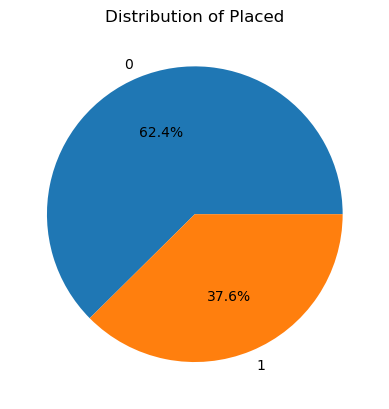

In [90]:
df_count = df['placed'].value_counts()
count=list(df_count.values)
index=list(df_count.index)
plt.pie(count,labels=index, autopct='%.1f%%')
plt.title('Distribution of Placed')
plt.show()

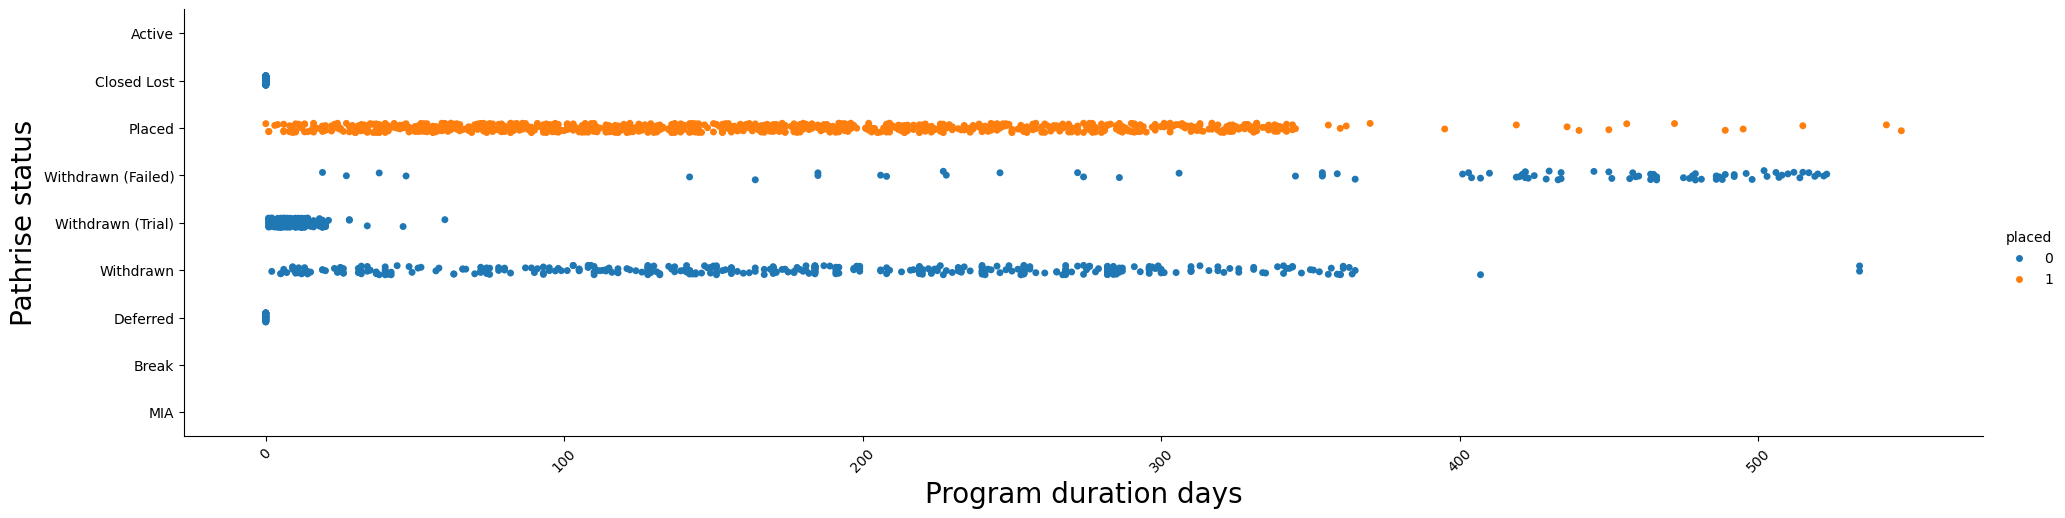

In [91]:
sns.catplot(y='pathrise_status', x='program_duration_days', hue='placed', data=df, aspect = 4)
plt.xlabel('Program duration days', fontsize=20)
plt.ylabel('Pathrise status', fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [92]:
df['employment_status '].value_counts() 
# The individual's current employment status (e.g., unemployed, employed, interviewing, etc.).
# وضعیت شغلی فعلی فرد (مثلاً بیکار، مشغول به کار، در حال مصاحبه و ...)

employment_status 
Student               775
Unemployed            665
Employed Full-Time    435
Employed Part-Time    270
Contractor            170
Name: count, dtype: int64

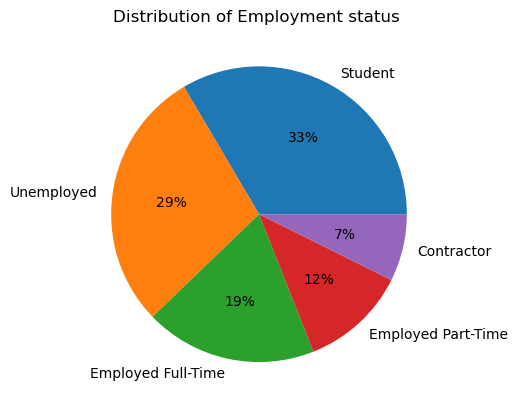

In [93]:
df_count = df['employment_status '].value_counts()
count=list(df_count.values)
index=list(df_count.index)
plt.pie(count,labels=index, autopct='%.0f%%')
plt.title('Distribution of Employment status ')
plt.show()

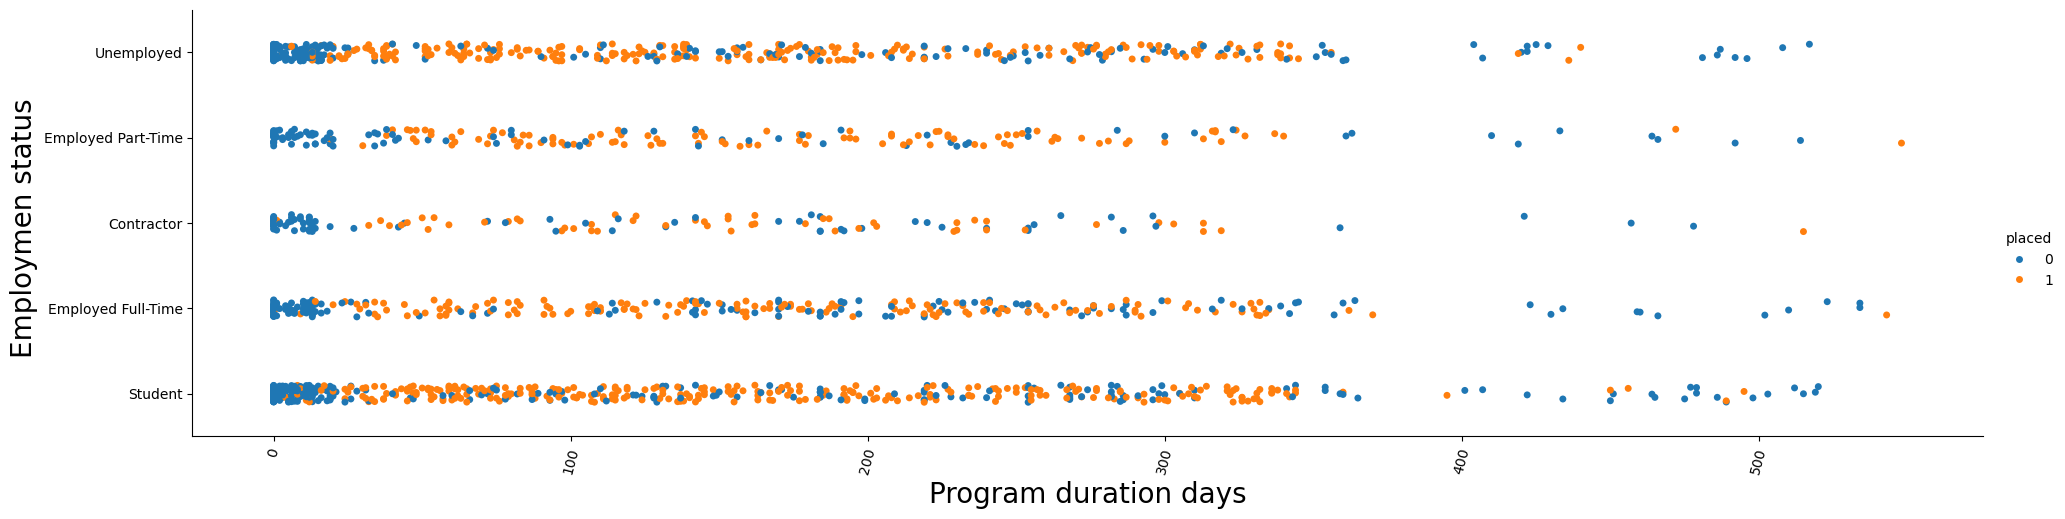

In [94]:
sns.catplot(y='employment_status ', x='program_duration_days', hue='placed', data=df, aspect=4)
plt.xlabel('Program duration days', fontsize=20)
plt.ylabel('Employmen status ', fontsize=20)
plt.xticks(rotation=75)
plt.show()

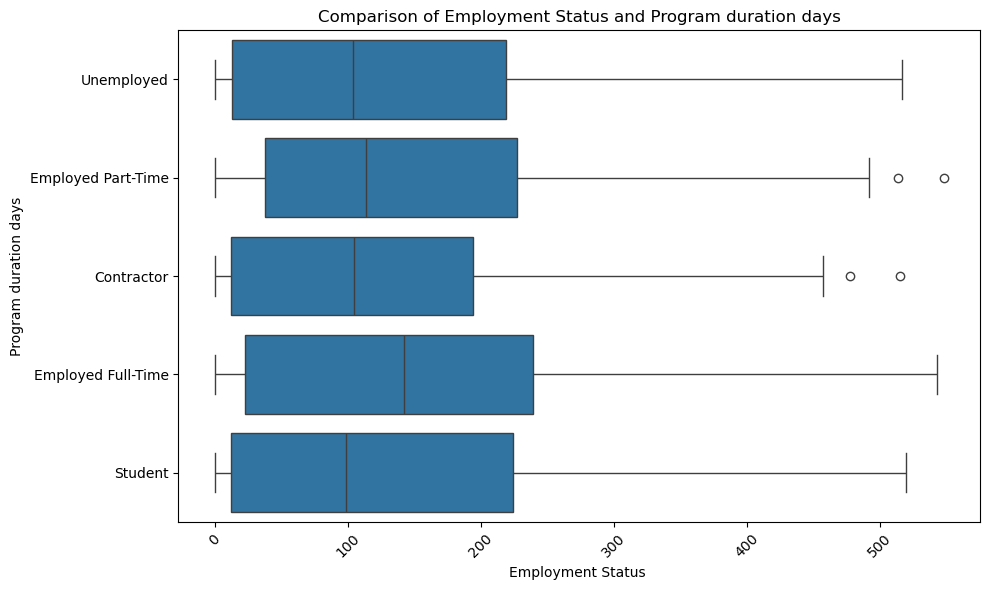

In [95]:
# Let's assume the target column is named 'program_duration_days'
# فرض کنیم نام ستون هدف 'program_duration_days' باشد
plt.figure(figsize=(10,6))
# Plotting a Boxplot
# رسم نمودار Boxplot
sns.boxplot(y='employment_status ', x='program_duration_days', data=df)

plt.title('Comparison of Employment Status and Program duration days')
plt.xlabel('Employment Status ')
plt.ylabel('Program duration days')

plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()


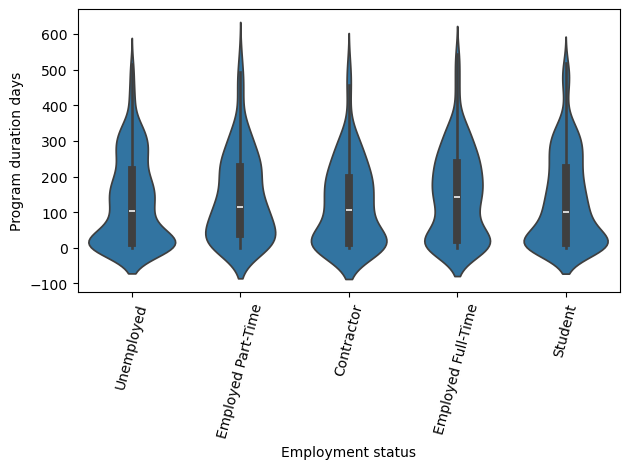

In [96]:
sns.violinplot(x='employment_status ', y='program_duration_days', data=df)
plt.xticks(rotation=75) 
plt.tight_layout()
plt.ylabel('Program duration days')
plt.xlabel('Employment status')
plt.show()

In [97]:
df[['employment_status ' , 'pathrise_status','placed']].head(20)

,employment_status,pathrise_status,placed
0,Unemployed,Active,0
1,Unemployed,Active,0
2,Employed Part-Time,Closed Lost,0
3,Contractor,Closed Lost,0
4,Unemployed,Placed,1
5,Employed Full-Time,Closed Lost,0
6,Employed Full-Time,Closed Lost,0
7,Employed Part-Time,Withdrawn (Failed),0
8,Student,Active,0
9,Employed Full-Time,Withdrawn (Trial),0


In [98]:
new_df = pd.get_dummies(new_df, columns=['employment_status '])

In [99]:
df['highest_level_of_education'].value_counts() 
# The highest level of education attained by the individual (e.g., High school, Bachelor's, Master's, PhD).
# بالاترین مدرک تحصیلی فرد (دیپلم، لیسانس، فوق‌لیسانس، دکترا و ...)

highest_level_of_education
Bachelor's Degree                   1361
Master's Degree                      810
Some College, No Degree              135
Doctorate or Professional Degree     135
High School Graduate                  15
GED or equivalent                     15
Some High School                      15
Name: count, dtype: int64

In [100]:

new_df['education_grouped'] = new_df['highest_level_of_education'].replace({
    "Some High School": "High School or Less",
    "GED or equivalent": "High School or Less",
    "High School Graduate": "High School or Less",
    "Some College, No Degree": "Some College",
    "Bachelor's Degree": "Bachelor’s",
    "Master's Degree": "Master’s",
    "Doctorate or Professional Degree": "Doctorate or Professional"
})

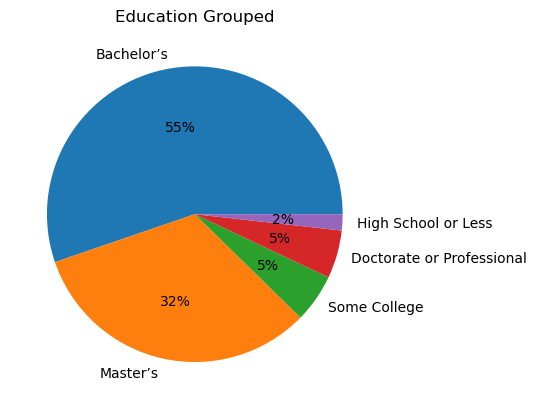

In [101]:
df_count = new_df['education_grouped'].value_counts()
count=list(df_count.values)
index=list(df_count.index)
plt.pie(count,labels=index, autopct='%.0f%%')
plt.title('Education Grouped')
plt.show()

In [102]:
new_df = pd.get_dummies(new_df, columns=['education_grouped'])


In [103]:
df['length_of_job_search'].value_counts() 
# The length of time the individual has been searching for a job (in days) -> Target variable.
# مدت زمان جستجوی شغل توسط فرد (بر حسب روز) → متغیر هدف 

length_of_job_search
Less than one month    815
1-2 months             785
3-5 months             515
6 months to a year     235
Over a year            120
Name: count, dtype: int64

In [104]:
new_df = pd.get_dummies(new_df, columns=['length_of_job_search'], prefix='job_search')

In [105]:
df['biggest_challenge_in_search'].value_counts() 
# The biggest challenge the individual faced in their job search (e.g., lack of experience, visa issues, few interviews, etc.).
# بزرگ‌ترین چالش فرد در پیدا کردن شغل (مثل کمبود تجربه، مشکلات ویزا و ...)

biggest_challenge_in_search
Hearing back on my applications         1002
Getting past final round interviews      294
Technical interviewing                   288
Lack of relevant experience              222
Getting past mid-stage interviews        210
Figuring out which jobs to apply for     186
Getting past phone screens               180
Behavioral interviewing                   60
Resume gap                                42
Technical skills                          36
Name: count, dtype: int64

In [106]:
new_df = pd.get_dummies(new_df, columns=['biggest_challenge_in_search'])

In [107]:
df['professional_experience'].value_counts() 
# The individual's professional experience level (e.g., entry-level, 1-2 years, 3-5 years, etc.).
# میزان تجربه‌ی حرفه‌ای فرد (مثلاً تازه‌کار، ۱-۲ سال، ۳-۵ سال و ...)

professional_experience
1-2 years             882
Less than one year    618
3-4 years             558
5+ years              264
Name: count, dtype: int64

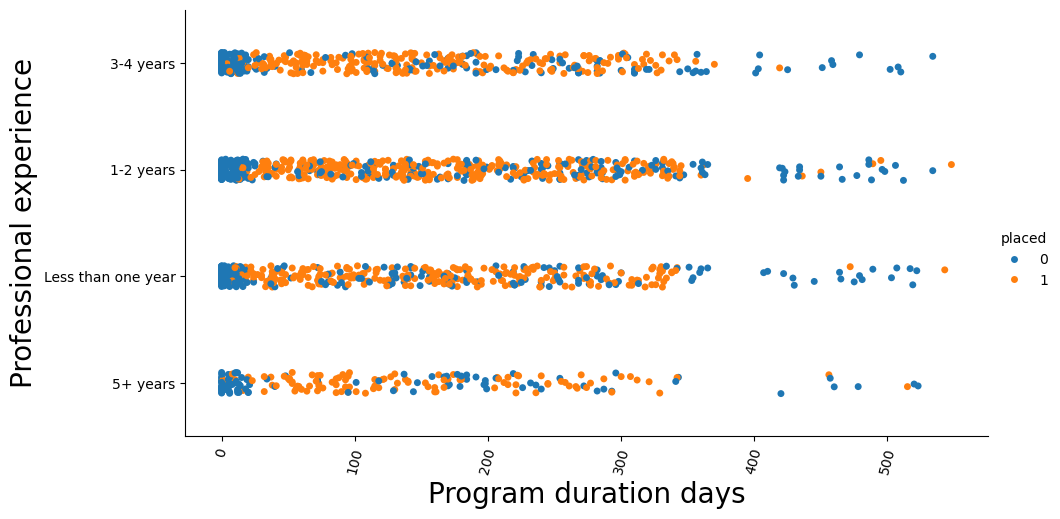

In [108]:
sns.catplot(y='professional_experience', x='program_duration_days', hue='placed', data=df, aspect=2)
plt.xlabel('Program duration days', fontsize=20)
plt.ylabel('Professional experience', fontsize=20)
plt.xticks(rotation=75)
plt.show()

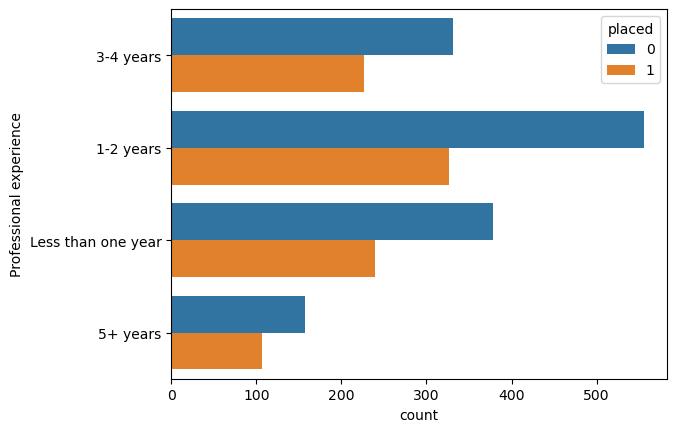

In [109]:
sns.countplot(y= 'professional_experience', hue='placed', data=df,  orient='v')
plt.ylabel('Professional experience')
plt.show()

In [110]:
new_df = pd.get_dummies(new_df, columns=['professional_experience'])


In [111]:
df['work_authorization_status'].value_counts() 
# The individual's work authorization status (e.g., citizen, work visa, needs sponsorship, etc.).
# وضعیت مجوز کار فرد (شهروند، ویزای کار، نیاز به اسپانسرشیپ و ...)

work_authorization_status
Citizen           1104
F1 Visa/OPT        644
Green Card         184
F1 Visa/CPT        132
Other              112
H1B                 48
Canada Citizen      24
STEM OPT             8
Not Authorized       4
Name: count, dtype: int64

In [112]:
new_df['work_auth_grouped'] = new_df['work_authorization_status'].replace({
    "Citizen": "Authorized",
    "Green Card": "Authorized",
    "Canada Citizen": "Authorized",
    "F1 Visa/OPT": "Temporary Work Visa",
    "STEM OPT": "Temporary Work Visa",
    "F1 Visa/CPT": "Student Work Visa",
    "H1B": "Work Visa",
    "Other": "Other",
    "Not Authorized": "Not Authorized"
})

new_df = pd.get_dummies(new_df, columns=['work_auth_grouped'])


In [113]:
df['number_of_interviews'].value_counts() 
# The number of interviews the individual has had.
# تعداد مصاحبه‌هایی که فرد تا کنون داشته است

number_of_interviews
0.0     758
1.0     522
2.0     307
3.0     203
4.0     193
5.0     137
6.0      76
7.0      60
10.0     19
20.0     18
8.0       6
11.0      4
18.0      4
17.0      4
19.0      3
14.0      3
15.0      2
9.0       2
16.0      2
12.0      2
13.0      1
Name: count, dtype: int64

20

In [114]:
df['number_of_applications'].value_counts() 
# The number of job applications the individual has submitted.
#تعداد درخواست‌های شغلی که فرد ارسال کرده است

number_of_applications
15      296
10      193
20      171
25      166
30      156
50      128
60      110
35      105
70       96
40       94
45       81
0        76
7        73
3        72
6        70
2        68
4        67
8        65
9        62
5        59
1        54
80       51
90       36
100      31
200      20
150      18
160      17
130      17
140      16
170      15
110      13
120      12
180      12
190      11
300       3
400       3
500       2
350       2
800       1
1000      1
900       1
Name: count, dtype: int64

In [115]:
df[df['number_of_applications'] > 400].shape[0]

5

In [116]:
df['gender'].value_counts() 
# The gender of the individual.
#جنسیت فرد

gender
Male                        1492
Female                       538
Decline to Self Identify      16
Non-Binary                     6
Name: count, dtype: int64

In [117]:
# Correlation analysis # محاسبه همبستگی
ddf=df.copy()
ddf['gender_encoded'] = ddf['gender'].map({
    'Male': 0,
    'Female': 1,
    'Decline to Self Identify': 2,
    'Non-Binary': 3
})
correlation = ddf['gender_encoded'].corr(ddf['program_duration_days'])

print(f"Correlation between 'gender' and 'program_duration_days': {correlation}")

Correlation between 'gender' and 'program_duration_days': -0.074762964436913


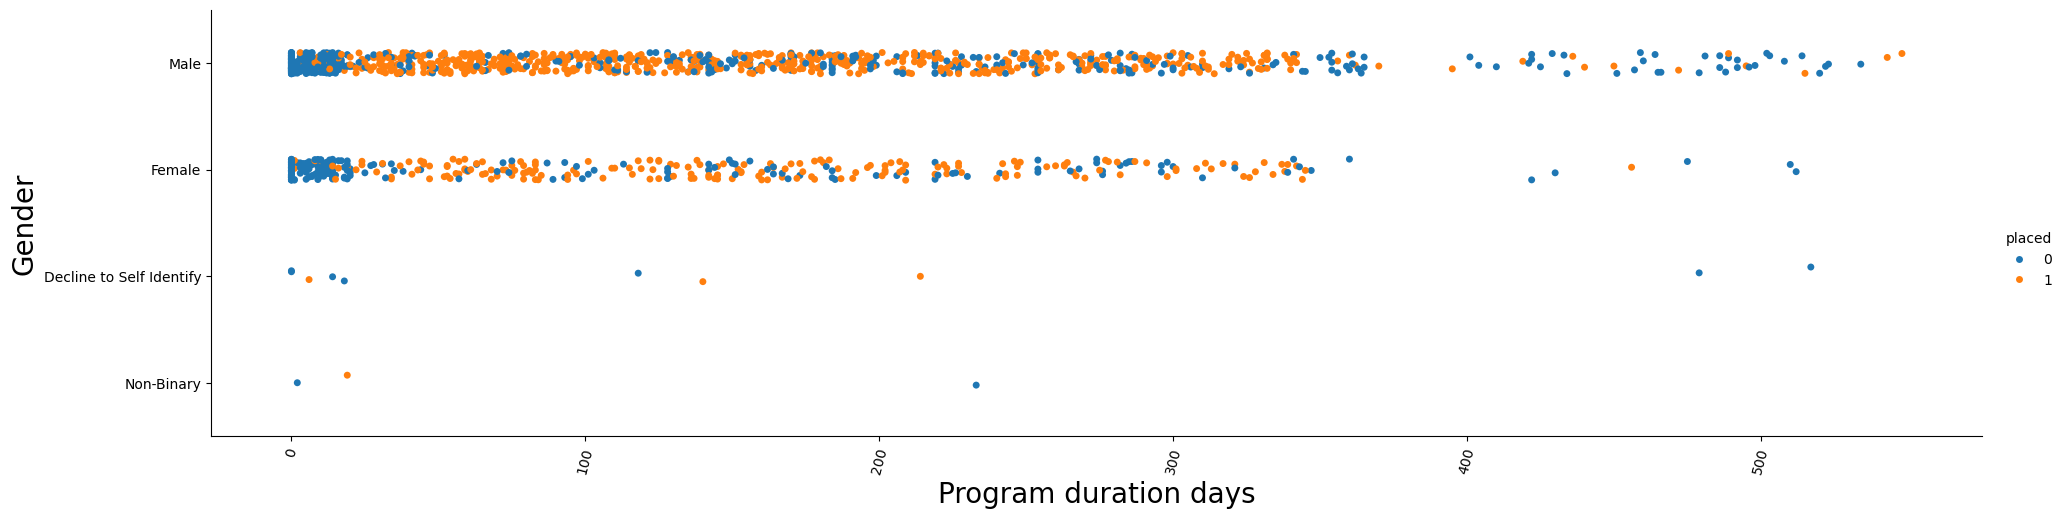

In [118]:
sns.catplot(y='gender', x='program_duration_days', hue='placed', data=df, aspect=4)
plt.xlabel('Program duration days', fontsize=20)
plt.ylabel('Gender', fontsize=20)
plt.xticks(rotation=75)
plt.show()

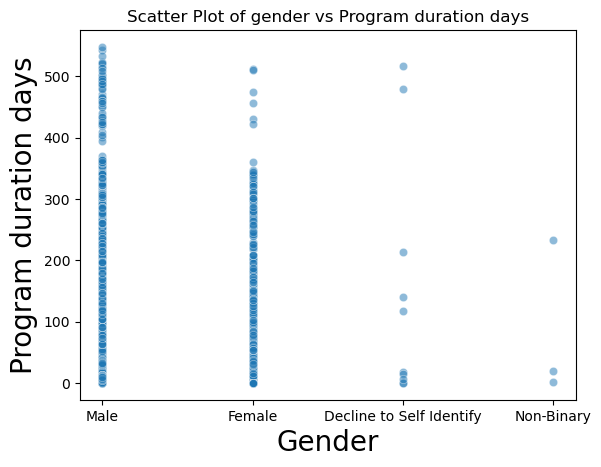

In [119]:
sns.scatterplot(x=df['gender'], y=df['program_duration_days'], alpha=0.5)
plt.title('Scatter Plot of gender vs Program duration days')
plt.ylabel('Program duration days', fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.show()

In [120]:
df['race'].value_counts() 
# The race or ethnicity of the individual.
# نژاد یا قومیت فرد


race
East Asian or Asian American                  900
Non-Hispanic White or Euro-American           573
South Asian or Indian American                537
Latino or Hispanic American                   156
Black, Afro-Caribbean, or African American    126
Two or More Races                              96
Decline to Self Identify                       69
Middle Eastern or Arab American                66
Native American or Alaskan Native               3
Name: count, dtype: int64

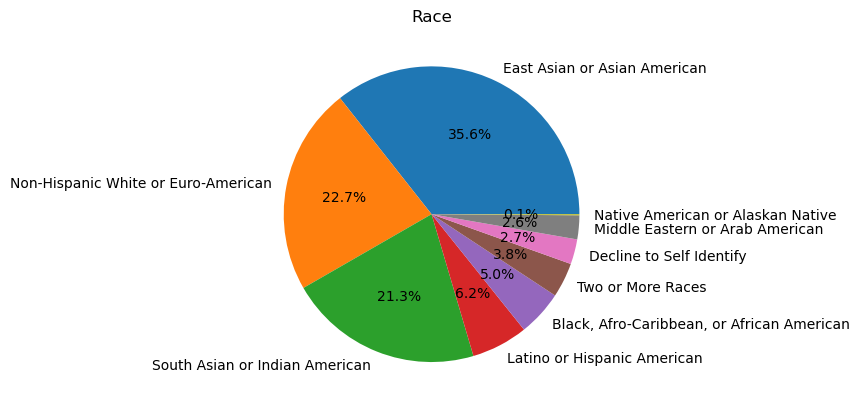

In [121]:
df_count = df['race'].value_counts()
count=list(df_count.values)
index=list(df_count.index)
plt.pie(count,labels=index, autopct='%.1f%%')
plt.title('Race')
plt.show()

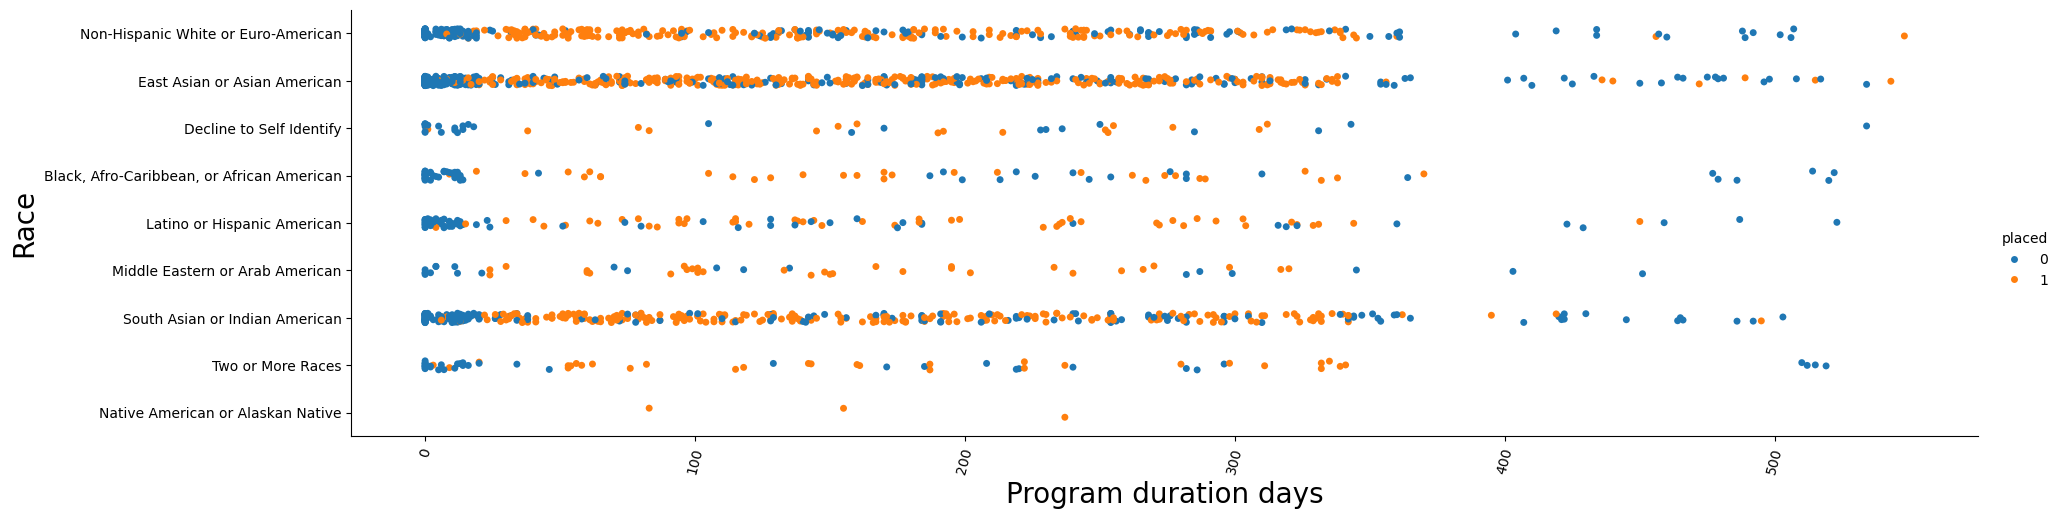

In [122]:
sns.catplot(y='race', x='program_duration_days', hue='placed', data=df, aspect=4)
plt.xlabel('Program duration days', fontsize=20)
plt.ylabel('Race', fontsize=20)
plt.xticks(rotation=75)
plt.show()

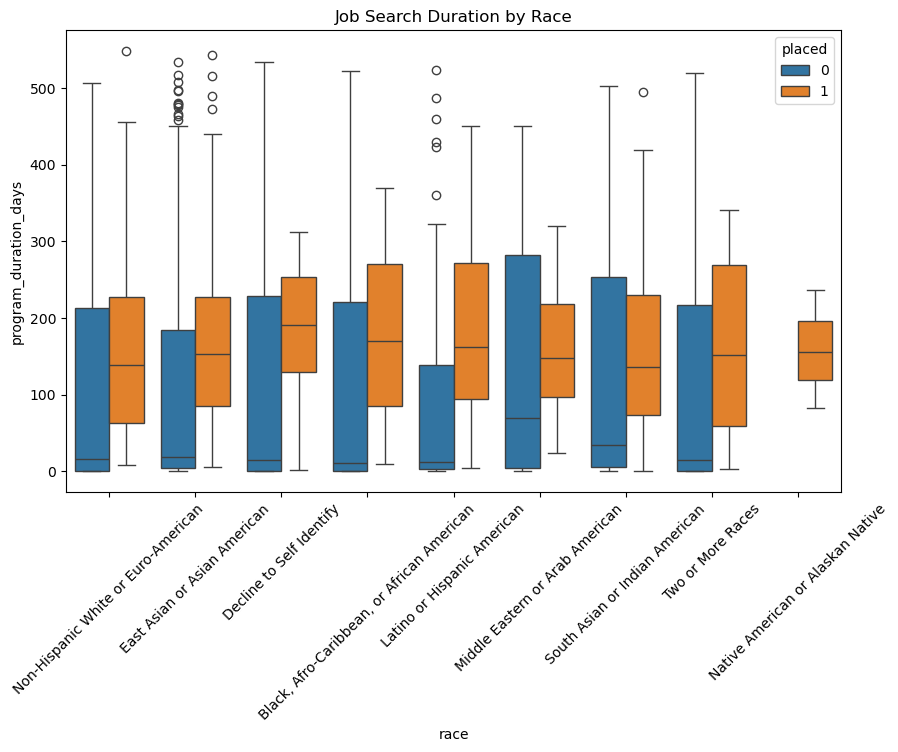

In [123]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='program_duration_days', hue='placed', data=df)
plt.xticks(rotation=45)
plt.title('Job Search Duration by Race')
plt.show()

In [124]:
new_df = pd.get_dummies(new_df, columns=['race'])


In [125]:
df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [126]:
numerical_cols = ["program_duration_days", "number_of_interviews"]
print(ddf[numerical_cols].describe())

       program_duration_days  number_of_interviews
count            1928.000000           2326.000000
mean              136.098548              2.182287
std               125.860248              2.959273
min                 0.000000              0.000000
25%                14.000000              0.000000
50%               112.000000              1.000000
75%               224.000000              3.000000
max               548.000000             20.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'program_duration_days'}>],
       [<Axes: title={'center': 'placed'}>,
        <Axes: title={'center': 'number_of_interviews'}>],
       [<Axes: title={'center': 'number_of_applications'}>, <Axes: >]],
      dtype=object)

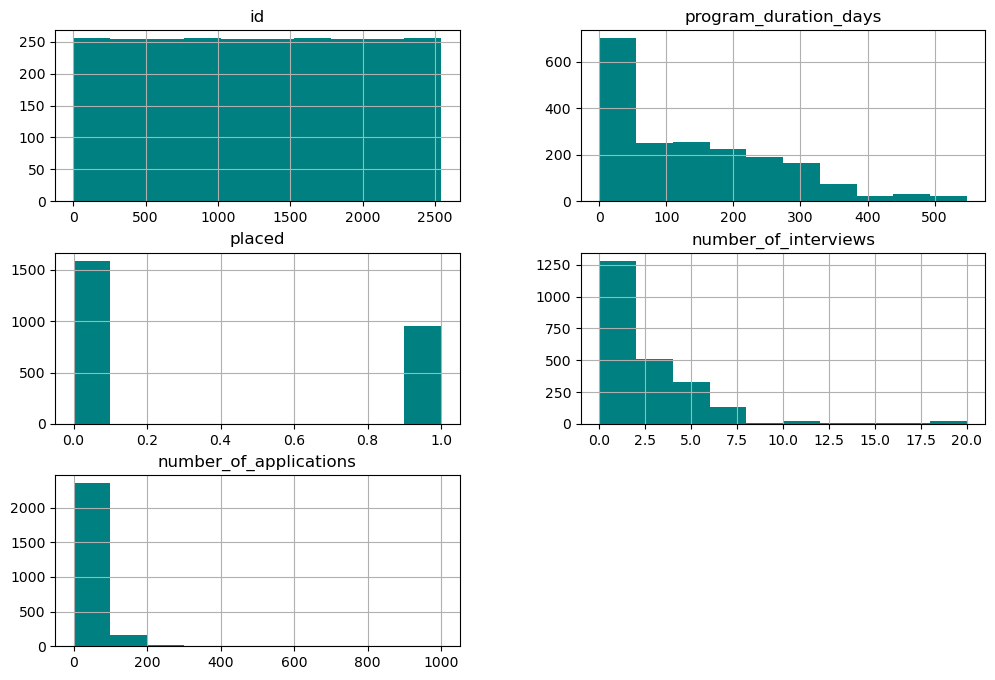

In [127]:
 df.hist(figsize=(12,8), color="#008080")  

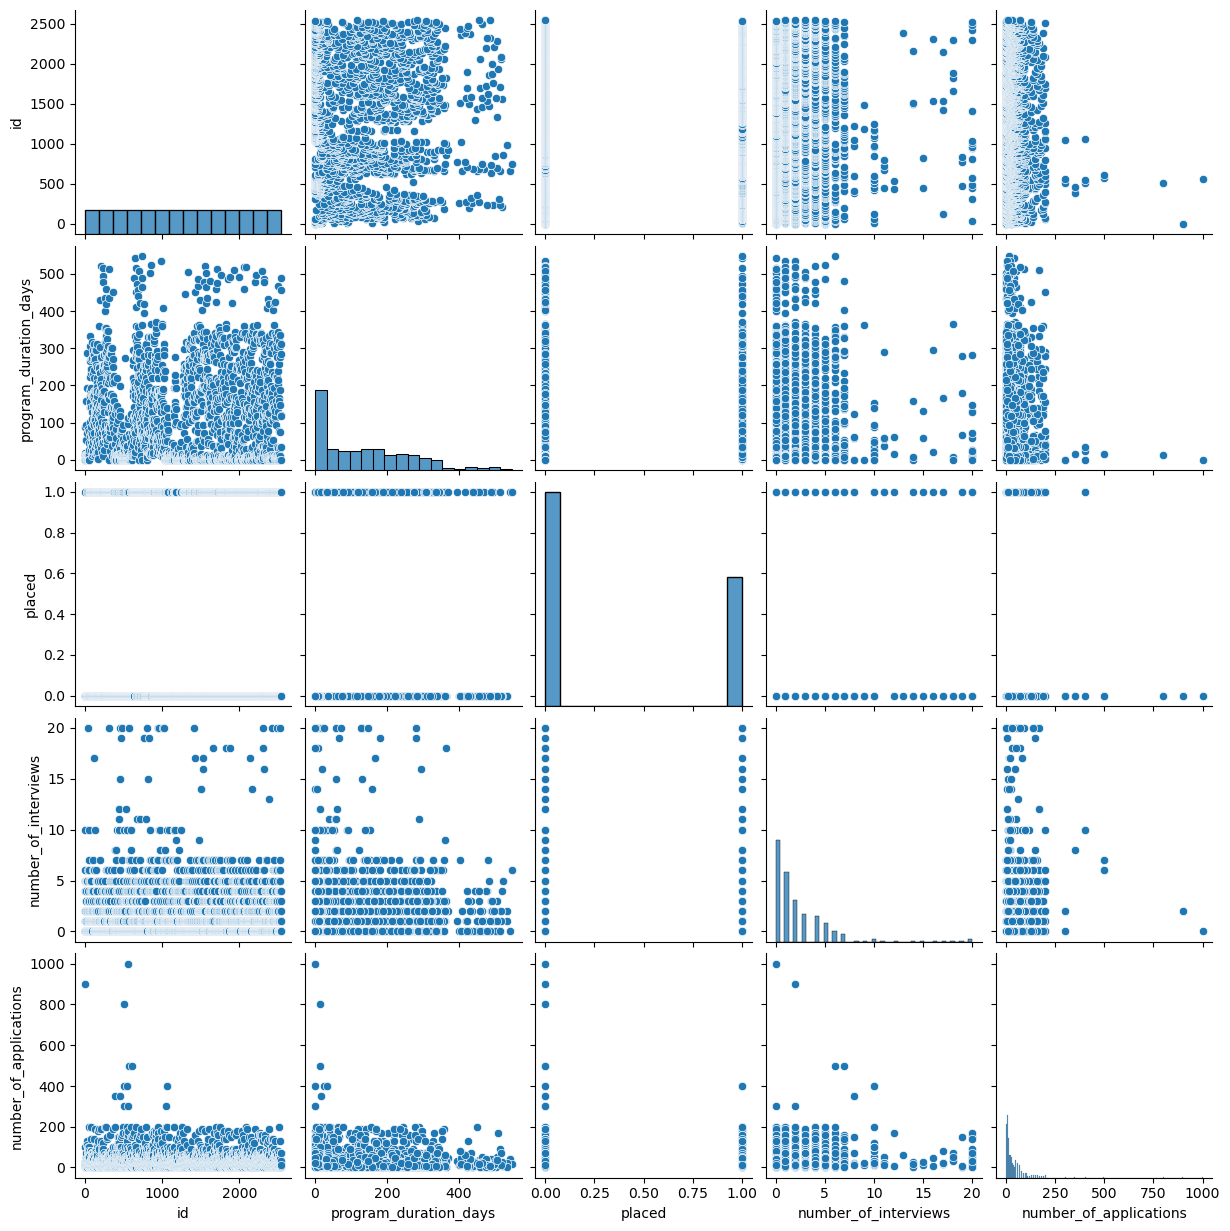

In [128]:

sns.pairplot(df)
sns.set_palette(['#004d00'])
plt.show()


In [129]:
new_df = new_df.drop(columns=[ 'work_authorization_status','highest_level_of_education' ])

In [130]:
print(df.columns)

Index(['id', 'pathrise_status', 'primary_track', 'cohort_tag',
       'program_duration_days', 'placed', 'employment_status ',
       'highest_level_of_education', 'length_of_job_search',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'number_of_interviews',
       'number_of_applications', 'gender', 'race'],
      dtype='object')


In [131]:
#Find common columns between two DataFrames
# پیدا کردن ستون‌های مشترک
common_columns = set(new_df.columns) & set(df.columns)
print(common_columns)

{'program_duration_days', 'number_of_interviews', 'number_of_applications', 'placed'}


In [132]:
new_df.head(2)

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,NaN,0,2.0,900,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,NaN,0,6.0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [133]:
print(new_df.isnull().sum())

program_duration_days                       535
placed                                        0
number_of_interviews                          0
number_of_applications                        0
primary_track_Data                            0
                                           ... 
race_Middle Eastern or Arab American          0
race_Native American or Alaskan Native        0
race_Non-Hispanic White or Euro-American      0
race_South Asian or Indian American           0
race_Two or More Races                        0
Length: 100, dtype: int64


In [134]:
for col in new_df.columns:
    if not new_df[col].isnull().any():
        new_df[col] = new_df[col].astype(int)

In [135]:
new_df

,program_duration_days,placed,number_of_interviews,number_of_applications,primary_track_Data,primary_track_Design,primary_track_PSO,primary_track_SWE,primary_track_Web & Marketing,cohort_tag_APR18A,...,work_auth_grouped_Work Visa,"race_Black, Afro-Caribbean, or African American",race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
0,NaN,0,2,900,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,0,6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,89.0,1,10,100,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,19.0,0,4,15,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,NaN,0,1,5,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,457.0,0,4,15,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2540,488.0,0,1,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2541,NaN,0,1,30,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2542,NaN,0,2,10,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# used to predict program duration days
#برای پیش بینی تعداد روزها
new_df2 = new_df[new_df['placed'] == 1]


In [137]:
len(new_df2)

881

In [138]:
len(new_df)

2150

In [139]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 4 to 2534
Data columns (total 100 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   program_duration_days                                             881 non-null    float64
 1   placed                                                            881 non-null    int32  
 2   number_of_interviews                                              881 non-null    int32  
 3   number_of_applications                                            881 non-null    int32  
 4   primary_track_Data                                                881 non-null    int32  
 5   primary_track_Design                                              881 non-null    int32  
 6   primary_track_PSO                                                 881 non-null    int32  
 7   primary_track_SWE                     

In [140]:
new_df2.columns[new_df2.isnull().any()]

Index([], dtype='object')

In [141]:
new_df2.isnull().sum()

program_duration_days                       0
placed                                      0
number_of_interviews                        0
number_of_applications                      0
primary_track_Data                          0
                                           ..
race_Middle Eastern or Arab American        0
race_Native American or Alaskan Native      0
race_Non-Hispanic White or Euro-American    0
race_South Asian or Indian American         0
race_Two or More Races                      0
Length: 100, dtype: int64

# Save

In [143]:
# Used for predicting the 'placed' status
#برای پیش بینی آره یا نه
new_df.to_csv('preprocessed_pathrise_df.csv', index= False)

In [144]:
# Used for predicting the 'program_duration_days' status
#برای پیش بینی تعداد روزها
new_df2.to_csv('preprocessed_pathrise_df_placed.csv', index= False)

In [145]:
# Percentage of data in each class
#چند درصد داده‌ها در هر کلاس
new_df['placed'].value_counts(normalize=True)


placed
0    0.590233
1    0.409767
Name: proportion, dtype: float64

In [146]:
# Percentage of data in each class
#چند درصد داده‌ها در هر کلاس
new_df2['program_duration_days'].value_counts(normalize=True)

program_duration_days
73.0     0.011351
59.0     0.010216
145.0    0.009081
332.0    0.007946
138.0    0.007946
           ...   
67.0     0.001135
44.0     0.001135
360.0    0.001135
232.0    0.001135
306.0    0.001135
Name: proportion, Length: 320, dtype: float64

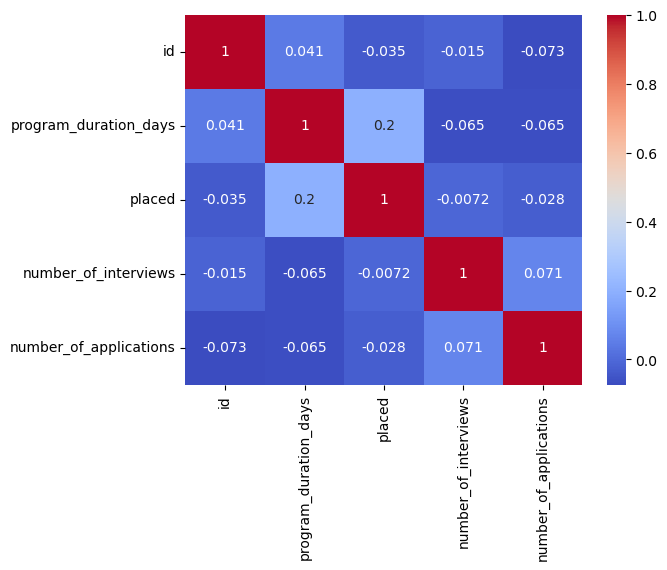

In [147]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [148]:
# Calculating the percentage distribution of the 'placed' column
new_df['placed'].value_counts(normalize=True)

placed
0    0.590233
1    0.409767
Name: proportion, dtype: float64

https://github.com/Mahdi-Alijani-Lati